Created as a group project for the Algorithm Analysis course using Google Colab, this Python project uses and tries various graph generation algorithms using NetworkX. Additionally, it evaluates different graph partitioning algorithms from the Sklearn library, comparing their time efficiency and accuracy. The comparisons are visually represented using Matplotlib for demonstration purposes.

Here is the code


**IMPORTS**

In [1]:
#important libraries
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
import time

#sklearn
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering,AgglomerativeClustering
from sklearn.cluster import MeanShift
from sklearn.cluster import OPTICS
from sklearn.mixture import GaussianMixture
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans

#networkx
from networkx.algorithms.community import greedy_modularity_communities

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.2 MB/s eta 0:00:00


**GRAPH GENERATING**

node count :  65


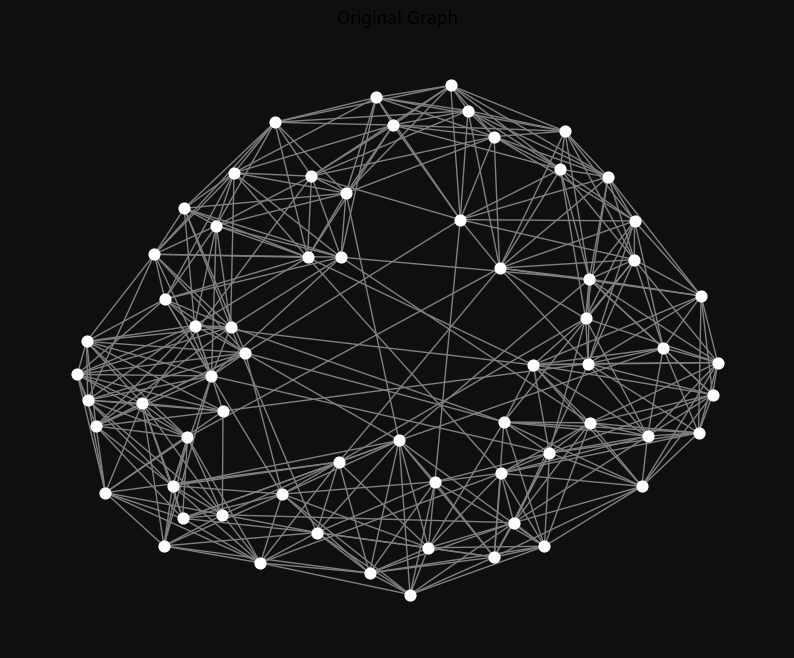

In [2]:

# RANDOM GRAPH

# Create Sample Graph
random_v =random.randint(3,100)
print("node count : ",random_v)

# Switch between erdos_renyi or watts_strogatz
#G = nx.erdos_renyi_graph(random_v,0.15,31)
G = nx.watts_strogatz_graph(random_v,12,0.1,31)

# Layouting
pos = nx.spring_layout(G)

# Sizing
fig, ax = plt.subplots(figsize=(10, 8))

# Draw the graph
nx.draw(G, pos, with_labels=False,node_size = 60,node_color='white',edge_color = 'gray')

# Show with matplotlib
fig.set_facecolor('#0f0f0f')
plt.style.use('dark_background')
plt.title("Original Graph")
plt.show()

**PARTITIONING MODELS**

Spectral Clustering
TIME : 0.06772375106811523
Spectral Clustering Siluet Skoru: 0.15994063595514735
Between cluster 1 and 2, 28 connection
Between cluster 1 and 3, 28 connection
Between cluster 2 and 3, 26 connection
total : 82


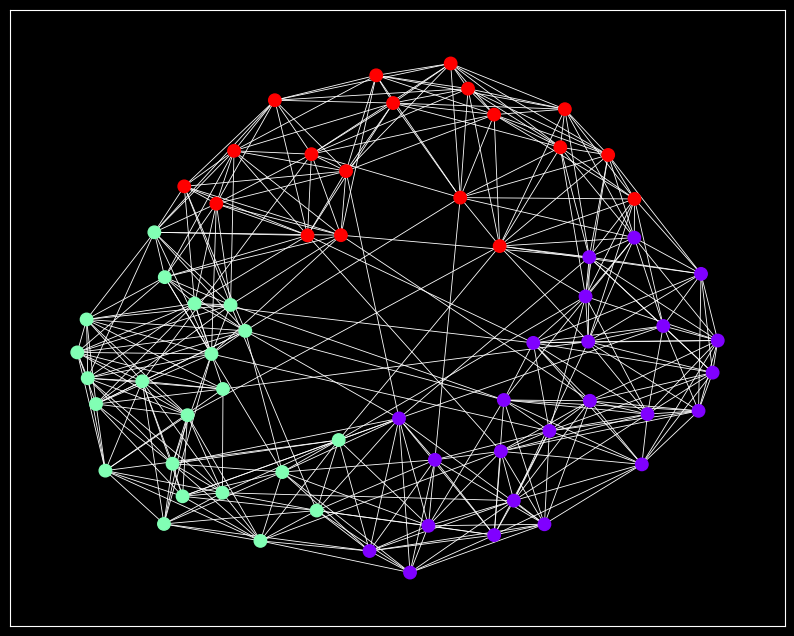

Gaussian Mixture
TIME : 0.032439231872558594
Gaussian Mixture Silhouette Score: 0.43346197676253134
Between cluster 1 and 2, 28 connection
Between cluster 1 and 3, 28 connection
Between cluster 2 and 3, 26 connection
total : 82


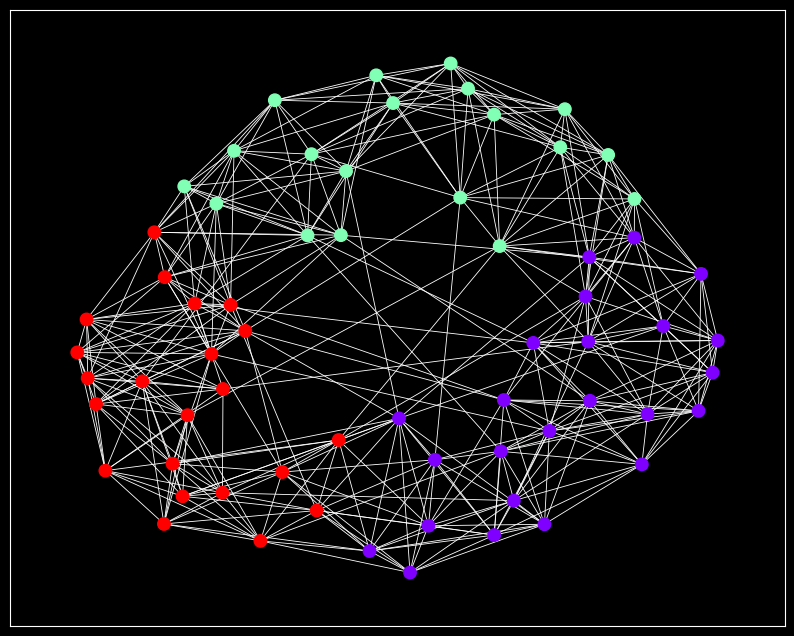

Agglomerative Clustering
TIME : 0.017506837844848633
Agglomerative Clustering Silhouette Score: 0.4099941555222158
Between cluster 1 and 2, 27 connection
Between cluster 1 and 3, 32 connection
Between cluster 2 and 3, 24 connection
total : 83


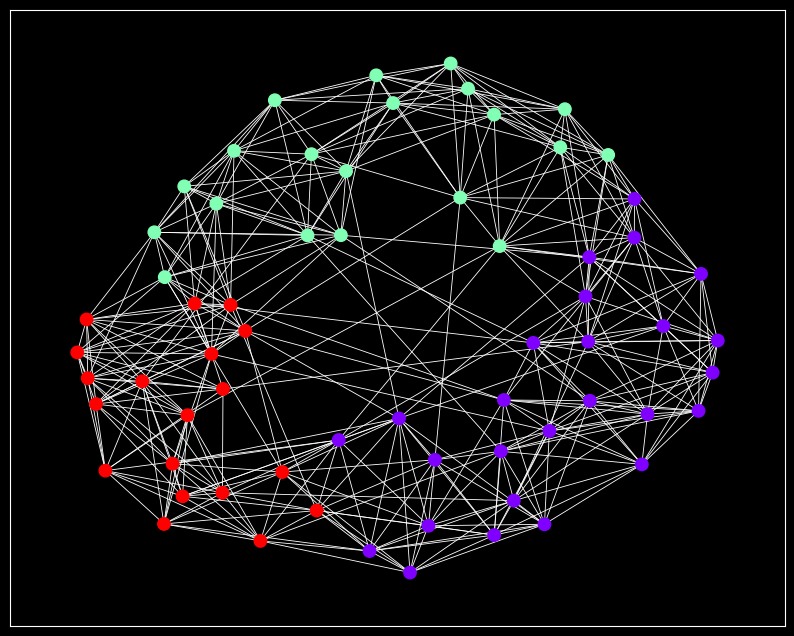

K Medoid Clustering
TIME : 0.004204750061035156
K Medoid Clustering Silhouette Score: 0.3753597780430197
Between cluster 1 and 2, 31 connection
Between cluster 1 and 3, 28 connection
Between cluster 2 and 3, 25 connection
total : 84


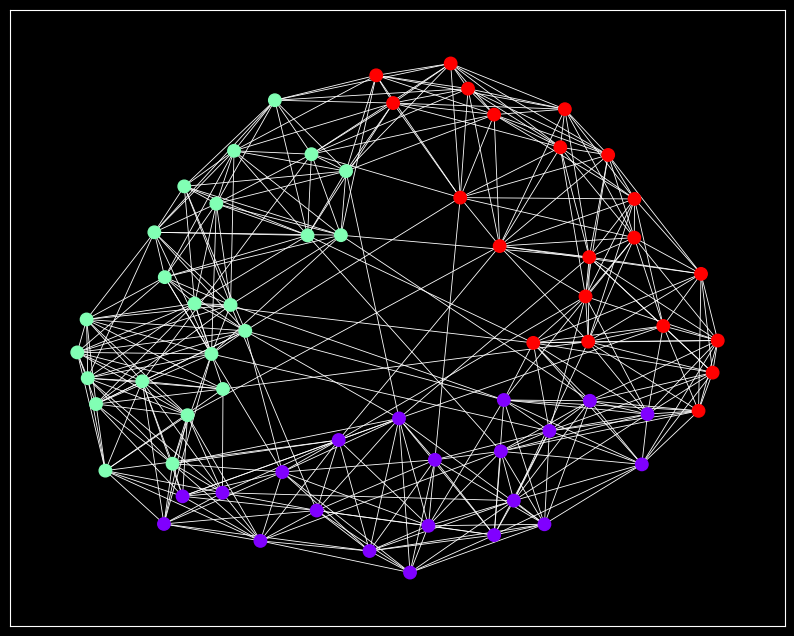

K Mini Batch Clustering
TIME : 0.01831221580505371
K Mini Batch Clustering Silhouette Score: 0.43445863017517566
Between cluster 1 and 2, 27 connection
Between cluster 1 and 3, 27 connection
Between cluster 2 and 3, 27 connection
total : 81


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


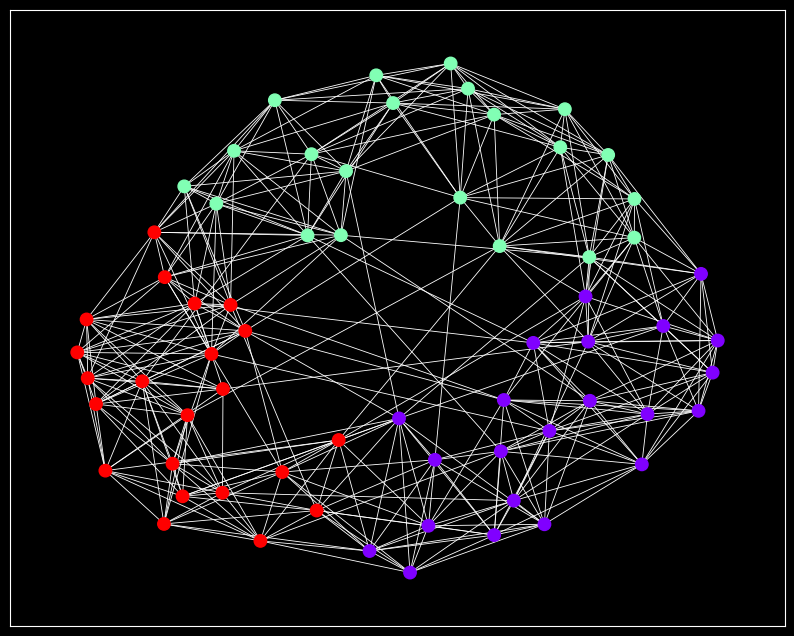

K Means Clustering
TIME : 0.024921655654907227
K Means Clustering Silhouette Score: 0.43445863017517566
Between cluster 1 and 2, 27 connection
Between cluster 1 and 3, 27 connection
Between cluster 2 and 3, 27 connection
total : 81


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


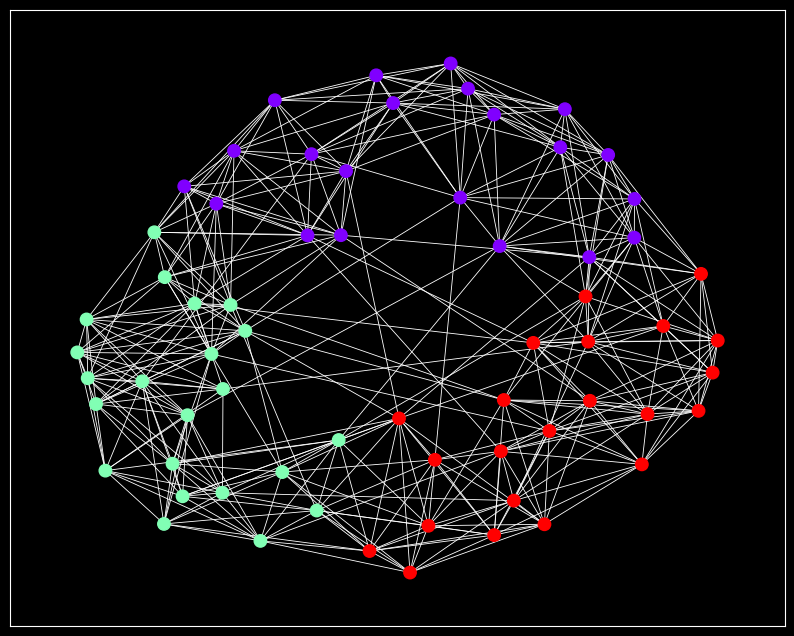

Fiduccia-Mattheyses Clustering
TIME : 0.03735661506652832
Fiduccia-Mattheyses Clustering Silhoute Score: 0.3309646955202778
Between cluster 1 and 2, 32 connection
Between cluster 1 and 3, 24 connection
Between cluster 2 and 3, 27 connection
total : 83


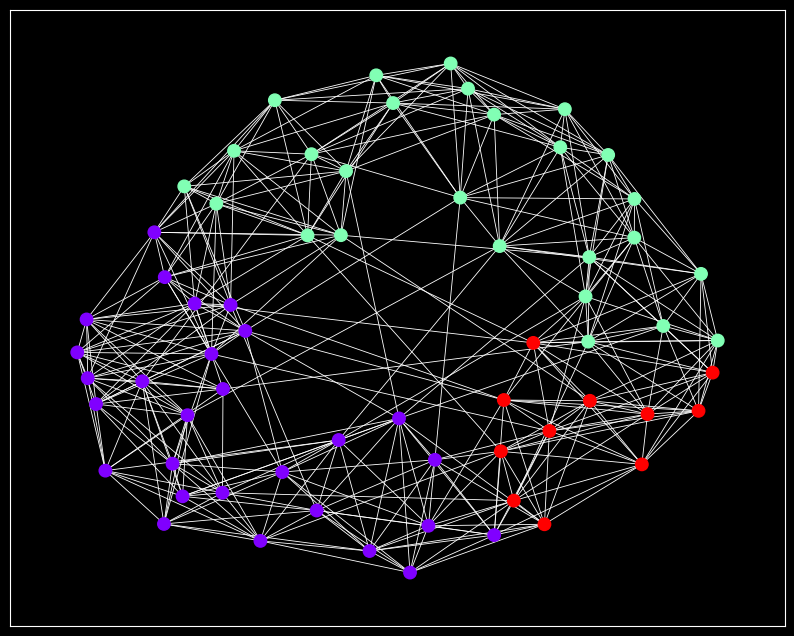

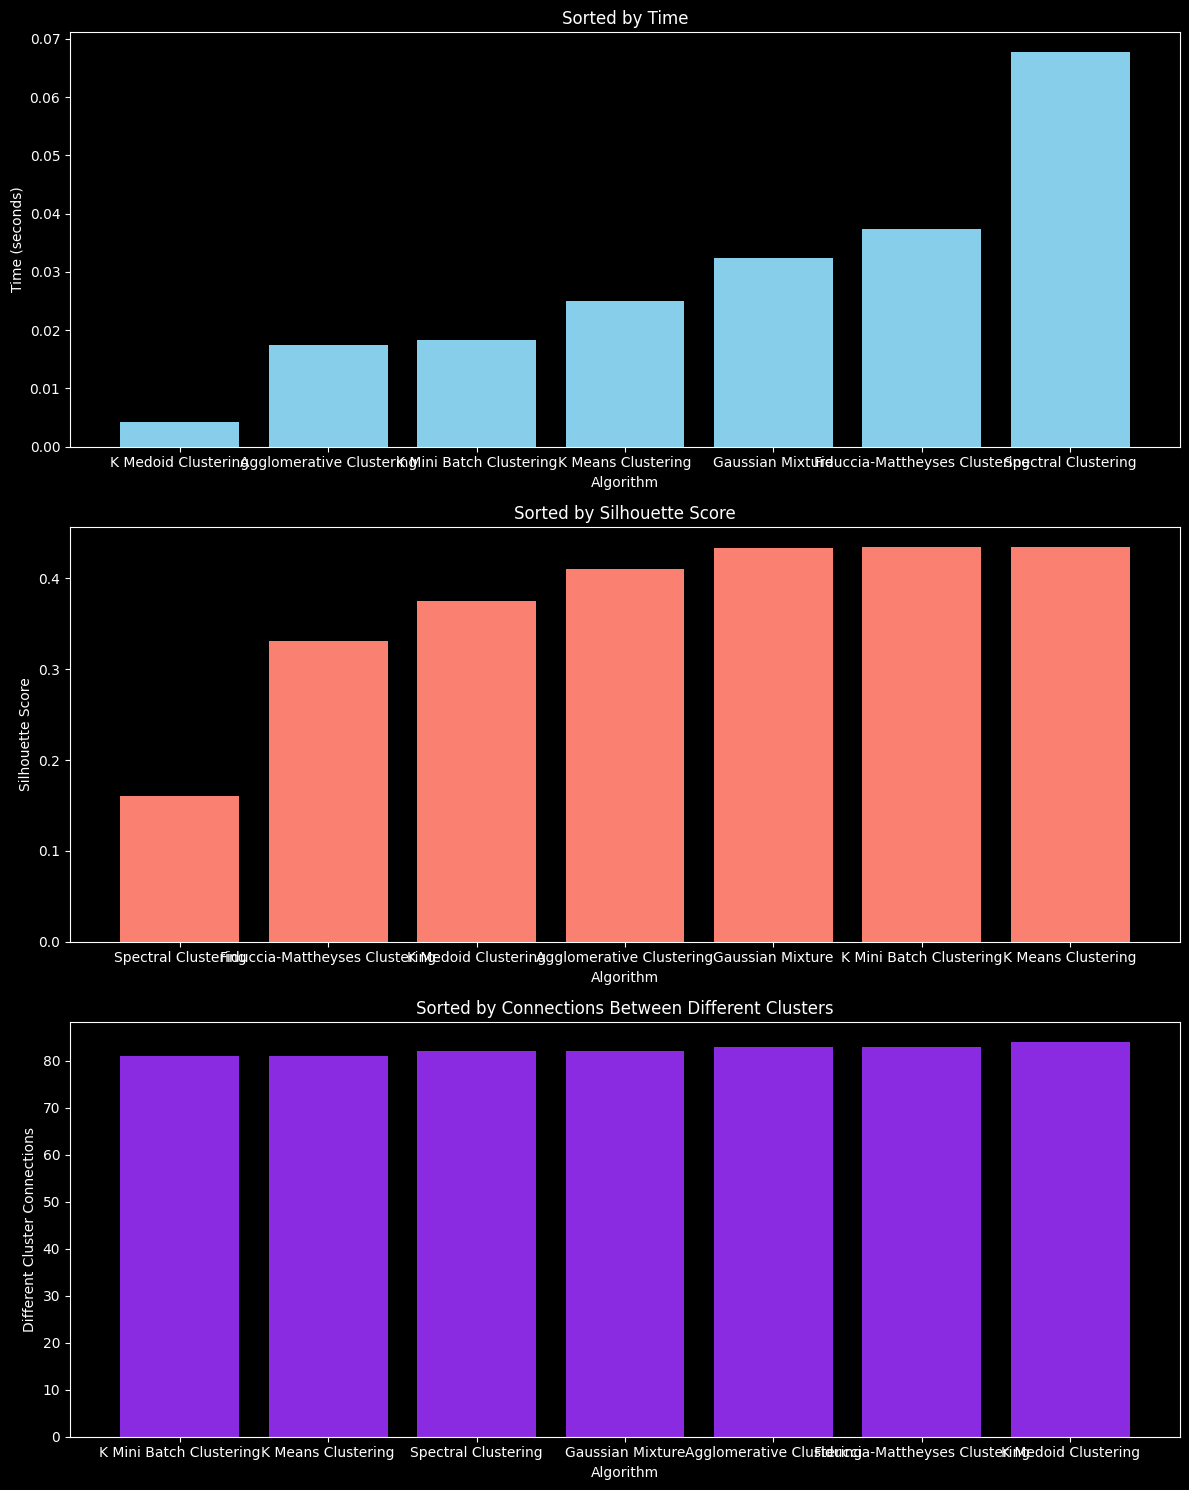

In [3]:
#Algorithms To Show
algorithms = ["Spectral Clustering", "Gaussian Mixture", "Agglomerative Clustering", "K Medoid Clustering",
              "K Mini Batch Clustering", "K Means Clustering","Fiduccia-Mattheyses Clustering"]
#Comparing Properties
times = []
silhouette_scores = []
diff_connections = []

###########################
# POST PROCESS
###########################

def post_process():
    # Adjust Color
    unique_labels = np.unique(labels)
    node_colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
    colors = [node_colors[label] for label in labels]

    # Adjust Size
    fig, ax = plt.subplots(figsize=(10, 8))

    # Show Clustering Results
    nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=80)
    nx.draw_networkx_edges(G, pos, width=0.6, edge_color='white')

    # Count Edges Betweeen Clusters
    def count_between_cluster_edges(G, labels, cluster1, cluster2):
        count = 0
        for edge in G.edges():
            node1, node2 = edge
          # label1, label2 = labels[node1], labels[node2]
            label1, label2 = labels[node1 - 1], labels[node2 - 1]
            if (label1 == cluster1 and label2 == cluster2) or (label1 == cluster2 and label2 == cluster1):
                count += 1
        return count
    total_edges = 0
    for cluster1 in range(n_components - 1):
        for cluster2 in range(cluster1 + 1, n_components):
            edge_count = count_between_cluster_edges(G, labels, cluster1, cluster2)
            total_edges += edge_count
            print(f"Between cluster {cluster1 + 1} and {cluster2 + 1}, {edge_count} connection")
    print(f"total : {total_edges}")
    diff_connections.append(total_edges)
    plt.show()


###########################
# MODELS
###########################

n_components = 3

# Spectral Clustering
print("Spectral Clustering")
adjacency_matrix = nx.to_numpy_array(G)
start_time = time.time()
spectral = SpectralClustering(n_clusters=n_components, affinity='precomputed', random_state=42)
labels = spectral.fit_predict(adjacency_matrix)
end_time=time.time()
print(f"TIME : {end_time-start_time}")
#siluet
silhouette_spectral = silhouette_score(adjacency_matrix, labels)
print(f"Spectral Clustering Siluet Skoru: {silhouette_spectral}")
silhouette_scores.append(silhouette_spectral)
times.append(end_time - start_time)
post_process()


#Gaussian Mixture
print("Gaussian Mixture")
X = np.array(list(pos.values()))
start_time = time.time()
gmm = GaussianMixture(n_components=n_components, random_state=42)
labels = gmm.fit_predict(X)
end_time=time.time()
print(f"TIME : {end_time-start_time}")
#siluet
silhouette_gmm = silhouette_score(X, labels)
print(f"Gaussian Mixture Silhouette Score: {silhouette_gmm}")
silhouette_scores.append(silhouette_gmm)
times.append(end_time - start_time)
post_process()

# AgglomerativeClustering
print("Agglomerative Clustering")
X = np.array(list(pos.values()))
start_time = time.time()
agg_cluster = AgglomerativeClustering(n_clusters = n_components)
labels = agg_cluster.fit_predict(X)
end_time=time.time()
print(f"TIME : {end_time-start_time}")
#siluet
silhouette_agg = silhouette_score(X, labels)
print(f"Agglomerative Clustering Silhouette Score: {silhouette_agg}")
silhouette_scores.append(silhouette_agg)
times.append(end_time - start_time)
post_process()

# KMedoid Clustering
print("K Medoid Clustering")
start_time = time.time()
kmedoids = KMedoids(n_clusters=n_components, random_state=42)
labels = kmedoids.fit_predict(X)
end_time=time.time()
print(f"TIME : {end_time-start_time}")
#siluet
silhouette_kmedoids = silhouette_score(X, labels)
print(f"K Medoid Clustering Silhouette Score: {silhouette_kmedoids}")
silhouette_scores.append(silhouette_kmedoids)
times.append(end_time - start_time)
post_process()

# KMiniBatch Clustering
print("K Mini Batch Clustering")
start_time = time.time()
minibatch_kmeans = MiniBatchKMeans(n_clusters=n_components, random_state=42)
labels = minibatch_kmeans.fit_predict(X)
end_time=time.time()
print(f"TIME : {end_time-start_time}")
#siluet
silhouette_minibatch = silhouette_score(X, labels)
print(f"K Mini Batch Clustering Silhouette Score: {silhouette_minibatch}")
silhouette_scores.append(silhouette_minibatch)
times.append(end_time - start_time)
post_process()

# KMeans Clustering
print("K Means Clustering")
start_time = time.time()
kmeans = KMeans(n_clusters=n_components, random_state=42)
labels = kmeans.fit_predict(X)
end_time=time.time()
print(f"TIME : {end_time-start_time}")
#siluet
silhouette_kmeans = silhouette_score(X, labels)
print(f"K Means Clustering Silhouette Score: {silhouette_kmeans}")
silhouette_scores.append(silhouette_kmeans)
times.append(end_time - start_time)
post_process()

#Fiduccia-Mattheyses Clustering
print("Fiduccia-Mattheyses Clustering")
start_time = time.time()
communities = list(greedy_modularity_communities(G,cutoff=n_components,best_n=n_components))
labels = np.zeros(len(G.nodes()), dtype=int)  # Ensure labels are integers
for idx, cluster in enumerate(communities):
    labels[list(cluster)] = idx
end_time=time.time()
print(f"TIME : {end_time-start_time}")
#siluet
silhouette_fmclustering= silhouette_score(X, labels)
print(f"Fiduccia-Mattheyses Clustering Silhoute Score: {silhouette_fmclustering}")
silhouette_scores.append(silhouette_fmclustering)
times.append(end_time - start_time)
post_process()



# Data Frame

data = {
    "Algorithm": algorithms,
    "Time (seconds)": times,
    "Silhouette Score": silhouette_scores,
    "diff_connections": diff_connections
}

df = pd.DataFrame(data)

# Sort By Time
df_sorted_time = df.sort_values(by="Time (seconds)")[["Algorithm", "Time (seconds)"]]

# Sort By Silhuette Scores
df_sorted_silhouette = df.sort_values(by="Silhouette Score")[["Algorithm", "Silhouette Score"]]

# Sort By Connections
df_sorted_conns = df.sort_values(by="diff_connections")[["Algorithm","diff_connections"]]

# Create Subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Sorted by Time
axes[0].bar(df_sorted_time["Algorithm"], df_sorted_time["Time (seconds)"], color='skyblue')
axes[0].set_title('Sorted by Time')
axes[0].set_xlabel('Algorithm')
axes[0].set_ylabel('Time (seconds)')

# Sorted by Silhouette Score
axes[1].bar(df_sorted_silhouette["Algorithm"], df_sorted_silhouette["Silhouette Score"], color='salmon')
axes[1].set_title('Sorted by Silhouette Score')
axes[1].set_xlabel('Algorithm')
axes[1].set_ylabel('Silhouette Score')

# Sorted by Different Connections
axes[2].bar(df_sorted_conns["Algorithm"], df_sorted_conns["diff_connections"], color='blueviolet')
axes[2].set_title('Sorted by Connections Between Different Clusters')
axes[2].set_xlabel('Algorithm')
axes[2].set_ylabel('Different Cluster Connections')

plt.tight_layout()
plt.show()
